### Import Libraries

In [11]:
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Load Dataset

In [2]:
basePath = "C:\\Users\\taylan\\Desktop\\taylan\\data_mining\\data"

files = glob.glob(basePath + "/*")
isFirst = True
dataFrame = ""

for i in files:
    for j in glob.glob(i+"/*"):
        if len(j.split(".")) == 1 :
            for k in glob.glob(j + "/*"):
                if isFirst == True:
                    dataFrame = pd.read_json(k)
                    isFirst = False
                else:
                    dataFrame = pd.concat([dataFrame, pd.read_json(k)], ignore_index=True)
                
        else:
            dataFrame = pd.concat([dataFrame, pd.read_json(j)], ignore_index=True)

In [3]:
dataFrame

,cmd_type,pool_id,sandbox_id,timestamp_str,hostname,cmd,ip,username,wd,tags
0,bash-command,0,396,2019-08-14 15:40:19.345589+00:00,attacker,nmap 172.18.1.5,10.0.135.83,root,/root,NaN
1,bash-command,0,396,2019-08-14 15:40:34.470540+00:00,attacker,nmap -A -p 22 172.18.1.5,10.0.135.83,root,/root,NaN
2,bash-command,0,396,2019-08-14 15:46:27.404601+00:00,attacker,service postgresql start,10.0.135.83,root,/root,NaN
3,bash-command,0,396,2019-08-14 15:46:31.391699+00:00,attacker,msfdb init,10.0.135.83,root,/root,NaN
4,bash-command,0,396,2019-08-14 15:46:34.560332+00:00,attacker,msfconsole,10.0.135.83,root,/root,NaN
...,...,...,...,...,...,...,...,...,...,...
21103,bash-command,1,374,2020-05-14 11:22:56.035944+02:00,attacker,msfconsole,10.1.135.83,root,/root,NaN
21104,msf-command,1,374,2020-05-14 11:23:53.519029+02:00,attacker,use exploit/unix/webapp/webmin_upload_exec > s...,10.1.135.83,NaN,NaN,NaN
21105,msf-command,1,374,2020-05-14 11:24:16.022195+02:00,attacker,exploit,10.1.135.83,NaN,NaN,NaN
21106,msf-command,1,374,2020-05-14 11:25:20.395195+02:00,attacker,exit,10.1.135.83,NaN,NaN,NaN


### Preprocessing

In [4]:
dataFrame = dataFrame.drop(["tags", "timestamp_str"], axis=1)

In [5]:
dataFrame = dataFrame[dataFrame["cmd"].isnull() == False]
dataFrame = dataFrame[dataFrame["cmd_type"].isnull() == False]

In [6]:
import re

def remove_non_english_words(text):
    english_word_pattern = re.compile(r'\b[a-zA-Z]+\b')

    english_words = english_word_pattern.findall(text)
    
    result_text = ' '.join(english_words)
    
    return result_text

In [7]:
commandList = dataFrame["cmd"]
commandListParametersRemoved = [] # initially empty list
for item in commandList:
    item = (item.split(" ")[0]).split("_")[0]
    item = remove_non_english_words(item)
    commandListParametersRemoved.append(item)
dataFrame["cmd"] = commandListParametersRemoved

dataFrame["username"] = dataFrame["username"].fillna("unknown_username")
dataFrame["wd"] = dataFrame["wd"].fillna("unknown_wd")



wdListRemoved = []
for item in dataFrame["wd"]:
    if "/" in item:
        item = item.split("/")[1]
    wdListRemoved.append(item)

dataFrame["wd"] = wdListRemoved

dataFrame

,cmd_type,pool_id,sandbox_id,hostname,cmd,ip,username,wd
0,bash-command,0,396,attacker,nmap,10.0.135.83,root,root
1,bash-command,0,396,attacker,nmap,10.0.135.83,root,root
2,bash-command,0,396,attacker,service,10.0.135.83,root,root
3,bash-command,0,396,attacker,msfdb,10.0.135.83,root,root
4,bash-command,0,396,attacker,msfconsole,10.0.135.83,root,root
...,...,...,...,...,...,...,...,...
21103,bash-command,1,374,attacker,msfconsole,10.1.135.83,root,root
21104,msf-command,1,374,attacker,use,10.1.135.83,unknown_username,unknown_wd
21105,msf-command,1,374,attacker,exploit,10.1.135.83,unknown_username,unknown_wd
21106,msf-command,1,374,attacker,exit,10.1.135.83,unknown_username,unknown_wd


In [8]:
dataFrame = dataFrame[dataFrame["cmd"].str.strip() != '']
dataFrame = dataFrame[dataFrame["username"].str.strip() != '']
dataFrame = dataFrame[dataFrame["wd"].str.strip() != '']

In [9]:
dataFrame

,cmd_type,pool_id,sandbox_id,hostname,cmd,ip,username,wd
0,bash-command,0,396,attacker,nmap,10.0.135.83,root,root
1,bash-command,0,396,attacker,nmap,10.0.135.83,root,root
2,bash-command,0,396,attacker,service,10.0.135.83,root,root
3,bash-command,0,396,attacker,msfdb,10.0.135.83,root,root
4,bash-command,0,396,attacker,msfconsole,10.0.135.83,root,root
...,...,...,...,...,...,...,...,...
21103,bash-command,1,374,attacker,msfconsole,10.1.135.83,root,root
21104,msf-command,1,374,attacker,use,10.1.135.83,unknown_username,unknown_wd
21105,msf-command,1,374,attacker,exploit,10.1.135.83,unknown_username,unknown_wd
21106,msf-command,1,374,attacker,exit,10.1.135.83,unknown_username,unknown_wd


In [10]:
dataFrame["cmd"].value_counts()

ls               2874
cd               2034
nmap             1487
set              1314
ssh               919
                 ... 
drwx                1
nmao                1
class               1
ln                  1
nmap services       1
Name: cmd, Length: 617, dtype: int64

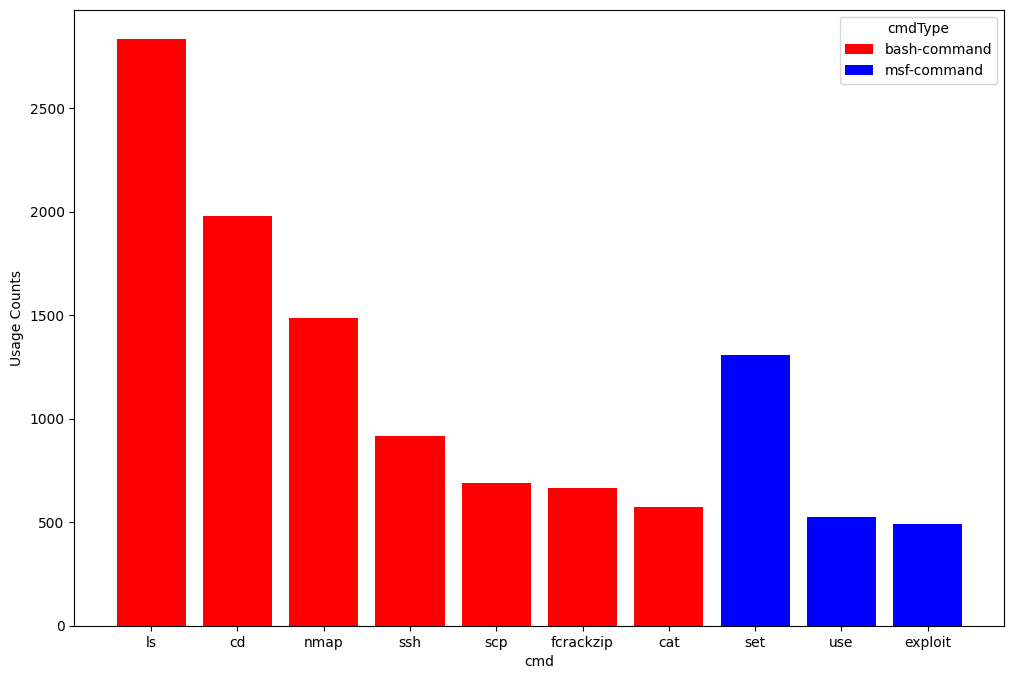

In [11]:
df = dataFrame
grouped_data = df.groupby(['cmd', 'cmd_type'])

# Calculate the count of each combination
result_df = grouped_data.size().reset_index(name='Usage count')
result_df = result_df.sort_values(by=["Usage count"], ascending=False).head(10)
commands = result_df["cmd"]
cmdTypes = result_df["cmd_type"]
usageCounts = result_df["Usage count"]


# fig, ax = plt.subplots(figsize =(12, 8)) 
# ax.bar(commands, usageCounts, color=["red", "blue"])
# ax.set_xlabel("cmd")
# ax.set_ylabel("Usage Counts")
# ax.legend(title="cmdType")
# plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
for cmd_type, color in zip(['bash-command', 'msf-command'], ['red', 'blue']):
    subset = result_df[result_df['cmd_type'] == cmd_type]
    ax.bar(subset['cmd'], subset['Usage count'], color=color, label=cmd_type)

ax.set_xlabel("cmd")
ax.set_ylabel("Usage Counts")

# Show legend
ax.legend(title="cmdType")

plt.show()

2, 617, 13, 16, 21, 201


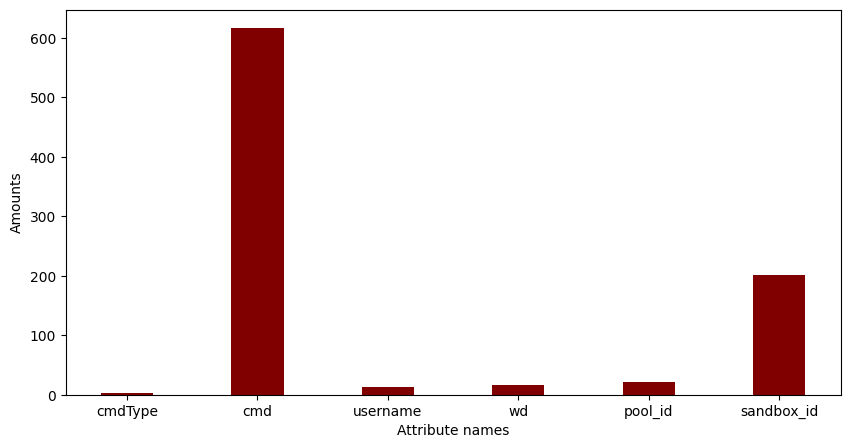

In [12]:
dataFrame
cmdTypeCount = len(dataFrame["cmd_type"].value_counts())
cmdCount = len(dataFrame["cmd"].value_counts())
usernameCount = len(dataFrame["username"].value_counts())
wdCount = len(dataFrame["wd"].value_counts())
poolIdCount = len(dataFrame["pool_id"].value_counts())
sandBoxIdCount = len(dataFrame["sandbox_id"].value_counts())

print(cmdTypeCount, cmdCount,usernameCount,wdCount,poolIdCount,sandBoxIdCount, sep=", ")

plt.figure(figsize=(10,5))
plt.bar(["cmdType", "cmd", "username", "wd", "pool_id", "sandbox_id"], [cmdTypeCount, cmdCount, usernameCount, wdCount, poolIdCount, sandBoxIdCount], color= "maroon" ,width=0.4)
plt.xlabel("Attribute names")
plt.ylabel("Amounts")
plt.show()



In [123]:
print(
    dataFrame["cmd_type"].max(),
    dataFrame["username"].max(),
    dataFrame["wd"].max(),
    dataFrame["cmd"].max(), 
    dataFrame["pool_id"].max(),
    dataFrame["ip"].max(),
    dataFrame["sandbox_id"].max(),
    sep=", "
)

msf-command, vagrant, var, zip, 87, 172.18.1.5, 714


In [124]:
newDataFrame = pd.DataFrame()
newDataFrame["cmd"] = pd.factorize(dataFrame["cmd"])[0] + 1
newDataFrame["username"] = pd.factorize(dataFrame["username"])[0] + 1
newDataFrame["hostname"] = pd.factorize(dataFrame["hostname"])[0] + 1
newDataFrame["wd"] = pd.factorize(dataFrame["wd"])[0] + 1
newDataFrame["cmd_type"] = pd.factorize(dataFrame["cmd_type"])[0] + 1
newDataFrame["ip"] = pd.factorize(dataFrame["ip"])[0] + 1
newDataFrame["pool_id"] = pd.factorize(dataFrame["pool_id"])[0] + 1
newDataFrame["sandbox_id"] = pd.factorize(dataFrame["sandbox_id"])[0] + 1
newDataFrame


,cmd,username,hostname,wd,cmd_type,ip,pool_id,sandbox_id
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,1
3,3,1,1,1,1,1,1,1
4,4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
19649,4,1,1,1,1,4,2,201
19650,8,2,1,2,2,4,2,201
19651,11,2,1,2,2,4,2,201
19652,14,2,1,2,2,4,2,201


In [97]:
x = newDataFrame.drop(["cmd_type"], axis=1).values
y = newDataFrame["cmd_type"].values

### Train, Test Split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [99]:
randomForest = RandomForestClassifier(n_estimators=5)
randomForest.fit(X_train, y_train)
accuracy = randomForest.score(X_test, y_test)
y_predict = randomForest.predict(X_test)
mse = mean_squared_error(y_pred= y_predict, y_true=y_test)
print("accuracy: ", accuracy)
print("mse: ", mse)

In [100]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
y_predict = knn.predict(X_test)
mse = mean_squared_error(y_pred= y_predict, y_true=y_test)
print("accuracy: ", accuracy)
print("mse: ", mse)

In [101]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)
accuracy = dtc.score(X_test, y_test)
y_predict = dtc.predict(X_test)
mse = mean_squared_error(y_pred= y_predict, y_true=y_test)
print("accuracy: ", accuracy)
print("mse: ", mse)

### Train Model

In [102]:
svc = SVC(C=1.5)
svc.fit(X_train, y_train)
accuracy = svc.score(X_test, y_test)
y_predict = svc.predict(X_test)
mse = mean_squared_error(y_pred= y_predict, y_true=y_test)
print("accuracy: ", accuracy)
print("mse: ", mse)



accuracy:  0.8776392775375222
mse:  0.12236072246247774


### Visualize Results

[[5528  375]
 [ 587 1372]]


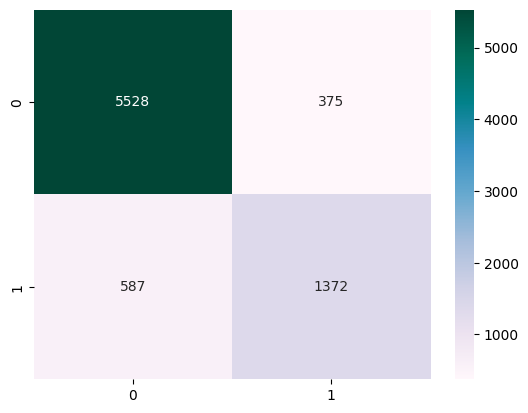

In [103]:
confusionMatrix = confusion_matrix(y_true=y_test, y_pred=y_predict)
print(confusionMatrix)
seaborn.heatmap(confusionMatrix, annot=True, fmt="d", cmap="PuBuGn")
plt.show()

In [125]:
cList = [1.0,1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,1.9, 2.0]
mseList = []
accuracyList = []
for c in cList:
    svc = SVC(C=c)
    svc.fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    y_predict = svc.predict(X_test)
    mse = mean_squared_error(y_pred= y_predict, y_true=y_test)
    print(f"accuracy for c={c}: {accuracy}: ")
    print(f"mse for c={c}: {mse}")
    mseList.append(mse)
    accuracyList.append(accuracy)

accuracy for c=1.0: 0.8720427372169931: 
mse for c=1.0: 0.12795726278300687
accuracy for c=1.1: 0.8768761129483592: 
mse for c=1.1: 0.1231238870516408
accuracy for c=1.2: 0.8775120834393284: 
mse for c=1.2: 0.12248791656067158
accuracy for c=1.3: 0.8767489188501654: 
mse for c=1.3: 0.12325108114983464
accuracy for c=1.4: 0.8767489188501654: 
mse for c=1.4: 0.12325108114983464
accuracy for c=1.5: 0.8776392775375222: 
mse for c=1.5: 0.12236072246247774
accuracy for c=1.6: 0.8782752480284914: 
mse for c=1.6: 0.12172475197150852
accuracy for c=1.7: 0.8778936657339099: 
mse for c=1.7: 0.12210633426609005
accuracy for c=1.8: 0.8773848893411346: 
mse for c=1.8: 0.12261511065886543
accuracy for c=1.9: 0.8768761129483592: 
mse for c=1.9: 0.1231238870516408
accuracy for c=2.0: 0.8768761129483592: 
mse for c=2.0: 0.1231238870516408


<Figure size 1000x1000 with 0 Axes>

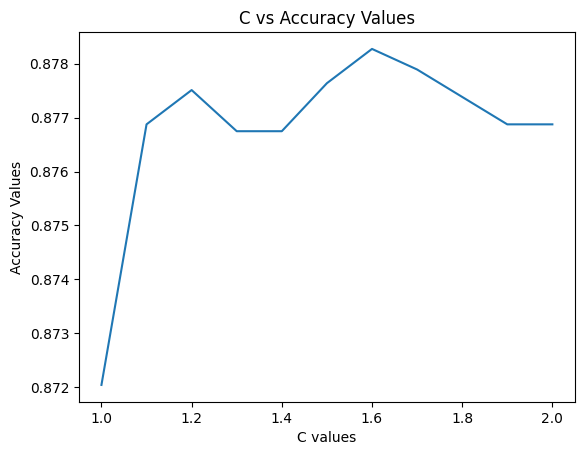

In [128]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax.plot(cList, accuracyList)
plt.xlabel("C values")
plt.ylabel("Accuracy Values")
plt.title("C vs Accuracy Values")
plt.show()

<Figure size 1000x1000 with 0 Axes>

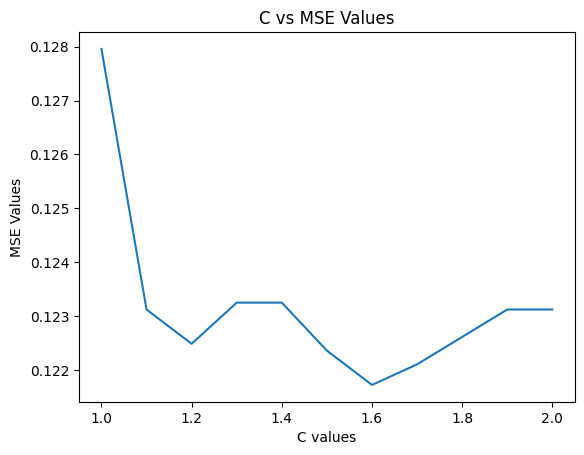

In [129]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax.plot(cList, mseList)
plt.xlabel("C values")
plt.ylabel("MSE Values")
plt.title("C vs MSE Values")
plt.show()